<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-OctavioGMoran/blob/main/Actividad6_Octavio_1213977.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**Actividad Semanal -- 6, visualización**

Materia:
Ciencia y analítica de datos

Fecha: 01/12/2022

Octavio Alberto García Morán - A01213977

---

In [34]:
#Librerías de trabajo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# **1. Descarga los datos y carga el dataset en tu libreta. Descripción aquí.**

In [4]:
url = 'https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv'
df1 = pd.read_csv(url, index_col=0)
df1.index.name = None

In [5]:
df1.head(5) #Validación de que los datos se importaron correctamente

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


# **2. Obten la información del DataFrame con los métodos y propiedades: shape, columns, head(), dtypes, info(), isna()**

**Adicionalmente, se explora la dimensión de la base de datos para identificar el número de columnas y filas, así como los diferentes tipos de variables.**

In [6]:
print('Dimensión del conjunto (Filas & Columnas): ',df1.shape)

Dimensión del conjunto (Filas & Columnas):  (30000, 24)


In [7]:
df1.info() #Tipos de variables

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      30000 non-null  int64  
 1   X2      29999 non-null  float64
 2   X3      29998 non-null  float64
 3   X4      29998 non-null  float64
 4   X5      29995 non-null  float64
 5   X6      29997 non-null  float64
 6   X7      29995 non-null  float64
 7   X8      29993 non-null  float64
 8   X9      29991 non-null  float64
 9   X10     29984 non-null  float64
 10  X11     29986 non-null  float64
 11  X12     29989 non-null  float64
 12  X13     29989 non-null  float64
 13  X14     29987 non-null  float64
 14  X15     29985 non-null  float64
 15  X16     29983 non-null  float64
 16  X17     29990 non-null  float64
 17  X18     29992 non-null  float64
 18  X19     29991 non-null  float64
 19  X20     29992 non-null  float64
 20  X21     29989 non-null  float64
 21  X22     29989 non-null  float64
 22

**Cambio del nombre a las variables**

In [8]:
df1.columns = ['amount_credit','gender','education','marital_status','age',
              'hry_sep', 'hry_aug', 'hry_jul', 'hry_jun', 'hry_may', 'hry_apl',
              'amt_sep', 'amt_aug', 'amt_jul', 'amt_jun', 'amt_may', 'amt_apl',
               'paid_sep', 'paid_aug', 'paid_jul', 'paid_jun', 'paid_may', 'paid_apl','Y']


# **3. Limpia los datos eliminando los registros nulos o rellena con la media de la columna**

**Revisamos la existencia de valores nulos en toda la base de datos:**

In [9]:
df1.isnull().any()

amount_credit     False
gender             True
education          True
marital_status     True
age                True
hry_sep            True
hry_aug            True
hry_jul            True
hry_jun            True
hry_may            True
hry_apl            True
amt_sep            True
amt_aug            True
amt_jul            True
amt_jun            True
amt_may            True
amt_apl            True
paid_sep           True
paid_aug           True
paid_jul           True
paid_jun           True
paid_may           True
paid_apl           True
Y                  True
dtype: bool

**Imputar la media en las variables vacías**

In [10]:
column_means = df1.mean() #Se utiliza la funcion mean para utilizar la mediana en los datos
df2 = df1.fillna(column_means)
df2.head(5)

,amount_credit,gender,education,marital_status,age,hry_sep,hry_aug,hry_jul,hry_jun,hry_may,...,amt_jun,amt_may,amt_apl,paid_sep,paid_aug,paid_jul,paid_jun,paid_may,paid_apl,Y
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


# **4. Calcula la estadística descriptiva con describe() y explica las medidas de tendencia central y dispersión**

In [11]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
amount_credit,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
gender,30000.0,1.603753,0.489117,1.0,1.00,2.0,2.00,2.0
education,30000.0,1.853057,0.790293,0.0,1.00,2.0,2.00,6.0
marital_status,30000.0,1.551903,0.521950,0.0,1.00,2.0,2.00,3.0
age,30000.0,35.484214,9.217256,21.0,28.00,34.0,41.00,79.0
hry_sep,30000.0,-0.016635,1.123773,-2.0,-1.00,0.0,0.00,8.0
hry_aug,30000.0,-0.133689,1.197154,-2.0,-1.00,0.0,0.00,8.0
hry_jul,30000.0,-0.166405,1.195908,-2.0,-1.00,0.0,0.00,8.0
hry_jun,30000.0,-0.220800,1.168977,-2.0,-1.00,0.0,0.00,8.0
hry_may,30000.0,-0.266342,1.132994,-2.0,-1.00,0.0,0.00,8.0


**Las medidas de tendencia central ayudan a conocer la distribución que tienen las variables, en especial la media es una que ayuda a poder tener una primera aproximación, como lo es el caso del monto de crédito, la diferencia entre el promedio y el máximo es importante, ya que el valor promedio está sobre los 168k de monto vs 1 millon; también sirve para validar los valores de algunas variables, como el género el valor mínimo es 1 y el máximo 2, lo que brinda certeza respecto a la cantidad de categorías que deben existir. Adicionalmente, la varianza permite medir la dispersión de los datos respecto a la media, lo que podría mostrar indicios de una variable sesgada**

**Se detectaron valores que no pertenecen al rango de dos variables, se procede a transformar los vectores.**

Primera variable: educación

In [20]:
df2["education"].unique()

array([2.        , 1.        , 3.        , 5.        , 4.        ,
       6.        , 0.        , 1.85305687])

In [21]:
mode_edu = int(df2["education"].mode())

In [22]:
df2["education"] = df2["education"].apply(lambda x: (mode_edu) if x > 4 else x)
df2["education"] = df2["education"].apply(lambda x: (mode_edu) if x < 1 else x)

In [24]:
df2["education"].unique()

array([2.        , 1.        , 3.        , 4.        , 1.85305687])

Segunda variable: estatus marital

In [25]:
mode_mar = int(df2["marital_status"].mode())

In [26]:
df2["marital_status"] = df2["marital_status"].apply(lambda x: (mode_mar) if x < 1 else x)

In [27]:
df2["marital_status"].unique()

array([1.        , 2.        , 3.        , 1.55190346])

In [28]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
amount_credit,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
gender,30000.0,1.603753,0.489117,1.0,1.00,2.0,2.00,2.0
education,30000.0,1.819190,0.707384,1.0,1.00,2.0,2.00,4.0
marital_status,30000.0,1.555503,0.518117,1.0,1.00,2.0,2.00,3.0
age,30000.0,35.484214,9.217256,21.0,28.00,34.0,41.00,79.0
hry_sep,30000.0,-0.016635,1.123773,-2.0,-1.00,0.0,0.00,8.0
hry_aug,30000.0,-0.133689,1.197154,-2.0,-1.00,0.0,0.00,8.0
hry_jul,30000.0,-0.166405,1.195908,-2.0,-1.00,0.0,0.00,8.0
hry_jun,30000.0,-0.220800,1.168977,-2.0,-1.00,0.0,0.00,8.0
hry_may,30000.0,-0.266342,1.132994,-2.0,-1.00,0.0,0.00,8.0


# **5. Realiza el conteo de las variables categóricas**

**Se realiza la partición de las variables númericas y las categóricas**

In [13]:
list_cat = list(df2.iloc[:,1:11])
list_cat.remove('age')

In [16]:
list_cat

['gender',
 'education',
 'marital_status',
 'hry_sep',
 'hry_aug',
 'hry_jul',
 'hry_jun',
 'hry_may',
 'hry_apl']

In [17]:
df_cat = df2[list_cat]
df_cat.head()

,gender,education,marital_status,hry_sep,hry_aug,hry_jul,hry_jun,hry_may,hry_apl
1,2.0,2.0,1.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0
2,2.0,2.0,2.0,-1.0,2.0,0.0,0.0,0.0,2.0
3,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,2.0,1.0,-1.0,0.0,-1.0,0.0,0.0,0.0


In [18]:
df_num = df2.drop(df_cat.columns,axis=1)
df_num.drop(axis=1,columns='Y',inplace=True)
df_num.head()

,amount_credit,age,amt_sep,amt_aug,amt_jul,amt_jun,amt_may,amt_apl,paid_sep,paid_aug,paid_jul,paid_jun,paid_may,paid_apl
1,20000,24.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
2,120000,26.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
3,90000,34.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
4,50000,37.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
5,50000,57.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


# **6. Escala los datos, si consideras necesario**

In [29]:
df3 = df2.iloc[:,12:23]
print(df3)

        amt_aug   amt_jul  amt_jun  amt_may  amt_apl  paid_sep  paid_aug  \
1        3102.0     689.0      0.0      0.0      0.0       0.0     689.0   
2        1725.0    2682.0   3272.0   3455.0   3261.0       0.0    1000.0   
3       14027.0   13559.0  14331.0  14948.0  15549.0    1518.0    1500.0   
4       48233.0   49291.0  28314.0  28959.0  29547.0    2000.0    2019.0   
5        5670.0   35835.0  20940.0  19146.0  19131.0    2000.0   36681.0   
...         ...       ...      ...      ...      ...       ...       ...   
29996  192815.0  208365.0  88004.0  31237.0  15980.0    8500.0   20000.0   
29997    1828.0    3502.0   8979.0   5190.0      0.0    1837.0    3526.0   
29998    3356.0    2758.0  20878.0  20582.0  19357.0       0.0       0.0   
29999   78379.0   76304.0  52774.0  11855.0  48944.0   85900.0    3409.0   
30000   48905.0   49764.0  36535.0  32428.0  15313.0    2078.0    1800.0   

       paid_jul  paid_jun  paid_may  paid_apl  
1           0.0       0.0       0.0    

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #Funcion para estandarizar
scaled = scaler.fit_transform(df3)

scaled_df = pd.DataFrame(scaled, columns=df3.columns) #Asignamos Nombre a las columnas
scaled_df.head(5)

,amt_aug,amt_jul,amt_jun,amt_may,amt_apl,paid_sep,paid_aug,paid_jul,paid_jun,paid_may,paid_apl
0,-0.647594,-0.668203,-0.672731,-0.663322,-0.652911,-0.341931,-0.227145,-0.296813,-0.308143,-0.314201,-0.293426
1,-0.666943,-0.639463,-0.621867,-0.606489,-0.598151,-0.341931,-0.213647,-0.240013,-0.244309,-0.314201,-0.180922
2,-0.494087,-0.482609,-0.449952,-0.417433,-0.391805,-0.250273,-0.191946,-0.240013,-0.244309,-0.248747,-0.012165
3,-0.013457,0.032672,-0.232583,-0.186958,-0.156743,-0.221170,-0.169420,-0.228653,-0.237926,-0.244230,-0.237174
4,-0.611511,-0.161373,-0.347213,-0.348378,-0.331654,-0.221170,1.334985,0.271182,0.266363,-0.269103,-0.255231


# **7. Reduce las dimensiones con PCA, si consideras necesario**

In [32]:
cols = ["amt_aug", "amt_jul"] 
summary = {
"Varianza": scaled_df[cols].var()[0:2],
"Valor Min": scaled_df[cols].min()[0:2],
"Valor Max": scaled_df[cols].max()[0:2]
}
#recuerda que la variable cols la definimos más arriba.
pd.DataFrame(summary, index = cols).transpose()

,amt_aug,amt_jul
Varianza,1.000033,1.000033
Valor Min,-1.671620,-2.945999
Valor Max,13.134066,23.319218


> **1. Indica la varianza de los datos explicada por cada componente seleccionado. Para actividades de exploración de los datos la varianza > 70%**



In [35]:
pcs = PCA()
pcs.fit(scaled_df.iloc[:,:].dropna(axis=0))
pcsSummary_df = pd.DataFrame({'Desviación Estándar': np.sqrt(pcs.explained_variance_),
                          'Proporción de varianza': pcs.explained_variance_ratio_,
                          'Varianza Acumulada': np.cumsum(pcs.explained_variance_ratio_)
                          }
                          )
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) +1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
Desviación Estándar,2.2316,1.2527,0.9520,0.9390,0.9310,0.8821,0.8524,0.4234,0.2410,0.1731,0.1572
Proporción de varianza,0.4527,0.1426,0.0824,0.0802,0.0788,0.0707,0.0660,0.0163,0.0053,0.0027,0.0022
Varianza Acumulada,0.4527,0.5953,0.6777,0.7579,0.8367,0.9074,0.9735,0.9897,0.9950,0.9978,1.0000


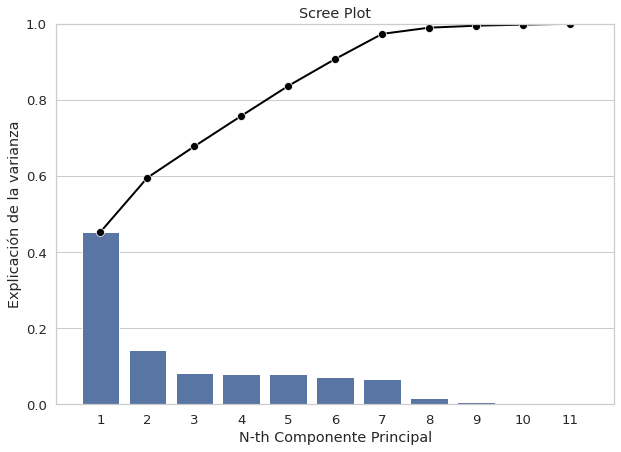

In [38]:
PC_components = np.arange(pcs.n_components_) + 1
#PC_components

Scree2 = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

Scree2 = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

Scree2 = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )
plt.title('Scree Plot')
plt.xlabel('N-th Componente Principal')
plt.ylabel('Explicación de la varianza')
plt.ylim(0, 1)
plt.show()

In [47]:
print('Variación explicada por los primeros 3 componentes:',((pcsSummary_df.iloc[2][3])*100).round(2))

Variación explicada por los primeros 3 componentes: 75.79


**En la siguiente parte veremos de manera distinta la gráfica presentada y nos ayudará a determinar el número de componentes necesarios.**

In [50]:
n=scaled_df.shape[1]

#encontrando los PCA
pca = PCA(n_components=n, random_state=1)
data_pca1 = pd.DataFrame(pca.fit_transform(scaled_df))

#varianza explicada por cada PCA
exp_var = pca.explained_variance_ratio_


# número mínimo de componentes que explican el 90% de la varianza
sum = 0
for ix, i in enumerate(exp_var):
  sum = sum + i
  if(sum>0.70):
    print("Número de PCA que explican al menos el 70% de la varianza: ", ix)
    break

Número de PCA que explican al menos el 70% de la varianza:  3


Text(0, 0.5, 'Varianza explicada acumulada')

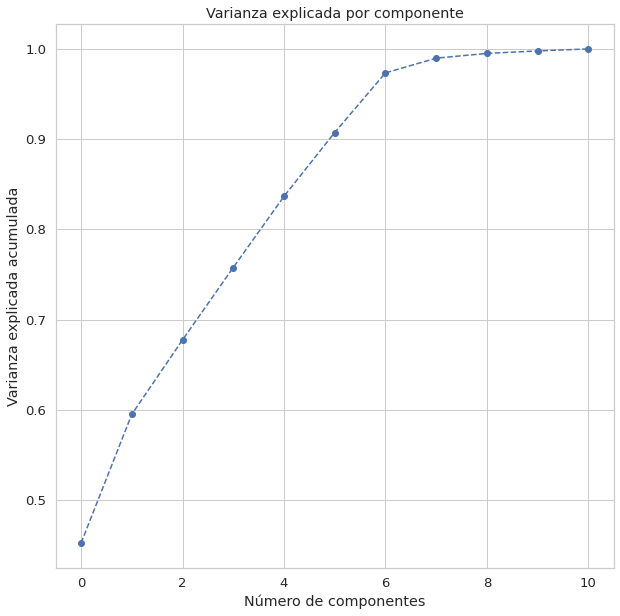

In [51]:
import matplotlib.pyplot as plt
# gráfica de la varianza explicada por componente
plt.figure(figsize = (10,10))
plt.plot(range(0,11), exp_var.cumsum(), marker = 'o', linestyle = '--')
plt.title("Varianza explicada por componente")
plt.xlabel("Número de componentes")
plt.ylabel("Varianza explicada acumulada")



> **2. Indica la importancia de las variables en cada componente**



**También, en la siguiente tabla, se revisará la importancia de cada uno de las variables originales dentro de cada uno de los PCA definidos, dependiendo del PCA que se observe la importancia de las variables cambia, sin embargo, generalmente las mas importantes se concentran en x18-x22 o en x14-x16**

In [52]:
pc_comps = ['PC1','PC2','PC3','PC4','PC5','PC6']
data_pca = pd.DataFrame(np.round(pca.components_[:6,:],2),index=pc_comps,columns=scaled_df.columns)
data_pca.T

,PC1,PC2,PC3,PC4,PC5,PC6
amt_aug,0.41,-0.19,0.02,-0.08,-0.06,-0.03
amt_jul,0.42,-0.15,0.05,-0.14,0.06,-0.12
amt_jun,0.43,-0.15,0.07,-0.03,0.01,0.13
amt_may,0.43,-0.14,0.02,0.12,-0.08,-0.00
amt_apl,0.42,-0.13,-0.13,0.12,0.06,0.02
paid_sep,0.16,0.41,0.38,-0.18,0.07,-0.21
paid_aug,0.14,0.44,0.29,-0.20,0.44,-0.30
paid_jul,0.15,0.42,0.22,0.30,0.03,0.79
paid_jun,0.13,0.37,-0.13,0.67,-0.39,-0.44
paid_may,0.13,0.31,-0.79,-0.06,0.44,0.06


In [53]:
def color_high(val):
    if val <= -0.40: # definición del 40%
        return 'background: pink'
    elif val >= 0.40:
        return 'background: skyblue'   
    
data_pca.T.style.applymap(color_high)

,PC1,PC2,PC3,PC4,PC5,PC6
amt_aug,0.410000,-0.190000,0.020000,-0.080000,-0.060000,-0.030000
amt_jul,0.420000,-0.150000,0.050000,-0.140000,0.060000,-0.120000
amt_jun,0.430000,-0.150000,0.070000,-0.030000,0.010000,0.130000
amt_may,0.430000,-0.140000,0.020000,0.120000,-0.080000,-0.000000
amt_apl,0.420000,-0.130000,-0.130000,0.120000,0.060000,0.020000
paid_sep,0.160000,0.410000,0.380000,-0.180000,0.070000,-0.210000
paid_aug,0.140000,0.440000,0.290000,-0.200000,0.440000,-0.300000
paid_jul,0.150000,0.420000,0.220000,0.300000,0.030000,0.790000
paid_jun,0.130000,0.370000,-0.130000,0.670000,-0.390000,-0.440000
paid_may,0.130000,0.310000,-0.790000,-0.060000,0.440000,0.060000


**Haciendo uso de las tablas obtenidas , dependiendo del PCA que se observe, las variables más relevantes que las que llevan AMT y las que van paid sep jun, ya que son las que tienen valores más altos del 40%+-**

# **8. Elabora los histogramas de los atributos para visualizar su distribución**

amt_aug
Skew : 2.71


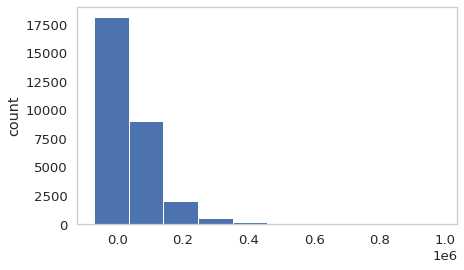

amt_jul
Skew : 3.09


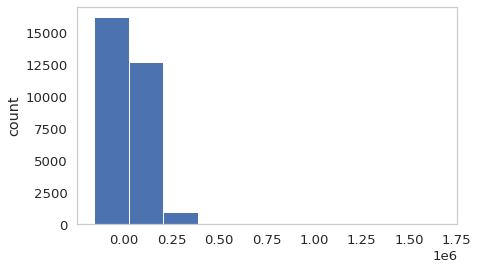

amt_jun
Skew : 2.82


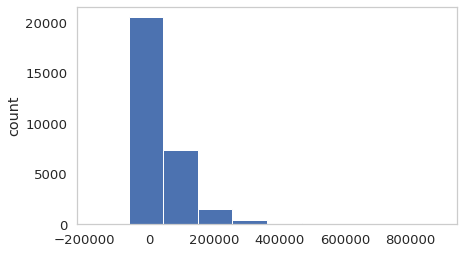

amt_may
Skew : 2.88


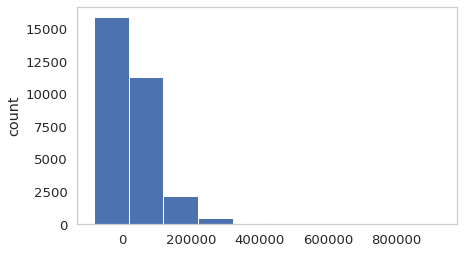

amt_apl
Skew : 2.85


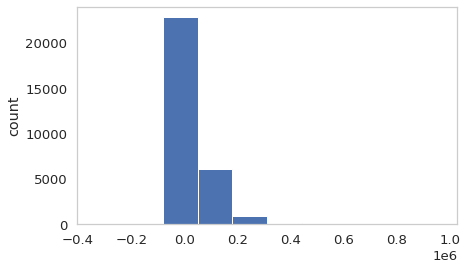

paid_sep
Skew : 14.67


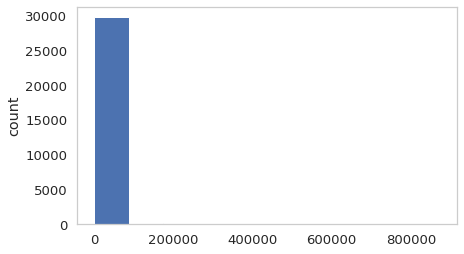

paid_aug
Skew : 30.45


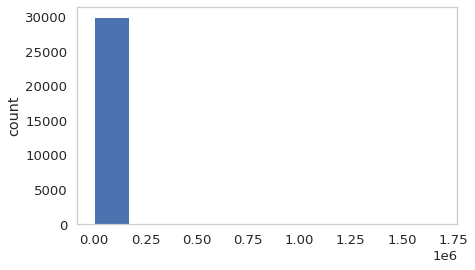

paid_jul
Skew : 17.22


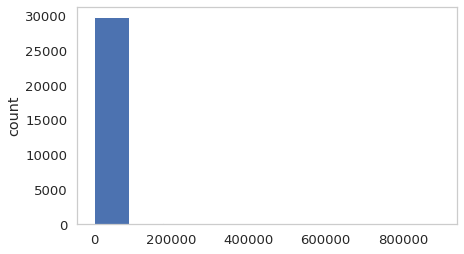

paid_jun
Skew : 12.91


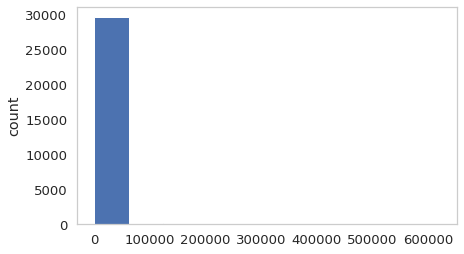

paid_may
Skew : 11.13


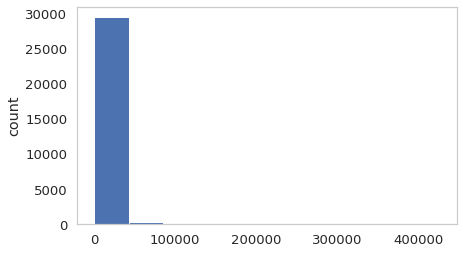

paid_apl
Skew : 10.64


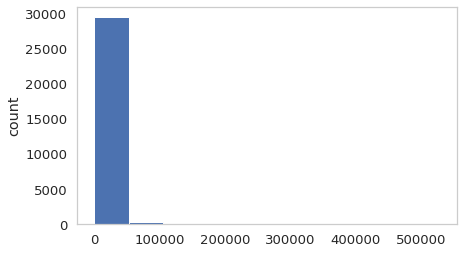

In [58]:
for col in df3.columns:
    print(col)
    print('Skew :',round(df3[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    df3[col].hist(bins=10, grid=False)
    plt.ylabel('count')
    plt.show()

**Muchas de las variables están cargadas a la izquierda, lo que puede significar un sesgo importante. En ejercicios posteriores se deberá buscar otra transformación que ayude a mitigar el sesgo.**

# **9. Realiza la visualización de los datos usando por lo menos 3 gráficos que consideres adecuados: plot, scatter, jointplot, boxplot, areaplot, pie chart, pairplot, bar chart, etc.**

amt_aug
Skew : 2.71


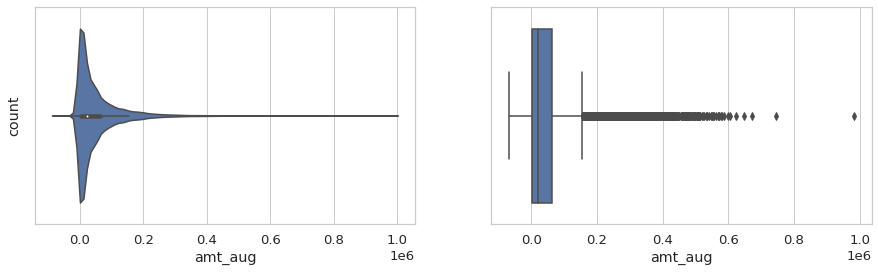

amt_jul
Skew : 3.09


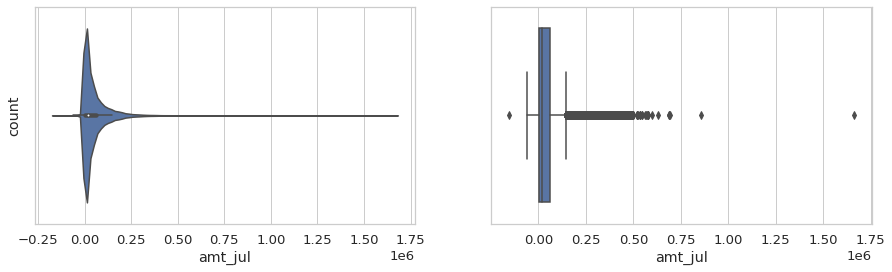

amt_jun
Skew : 2.82


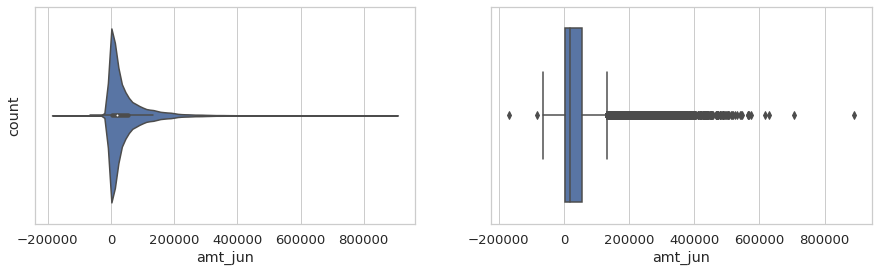

amt_may
Skew : 2.88


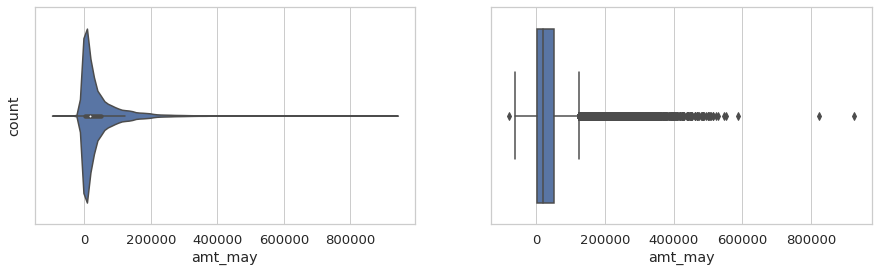

amt_apl
Skew : 2.85


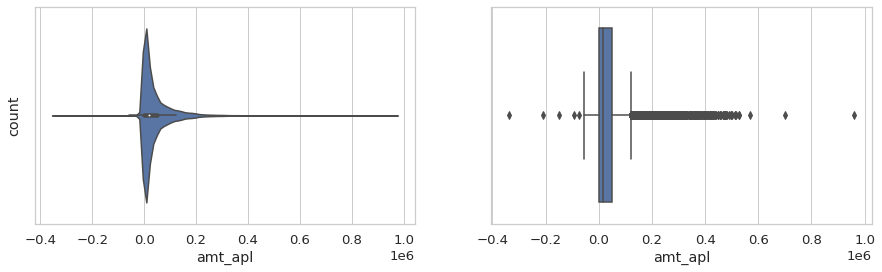

paid_sep
Skew : 14.67


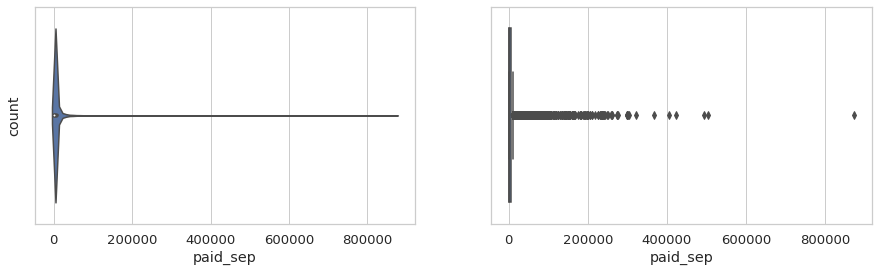

paid_aug
Skew : 30.45


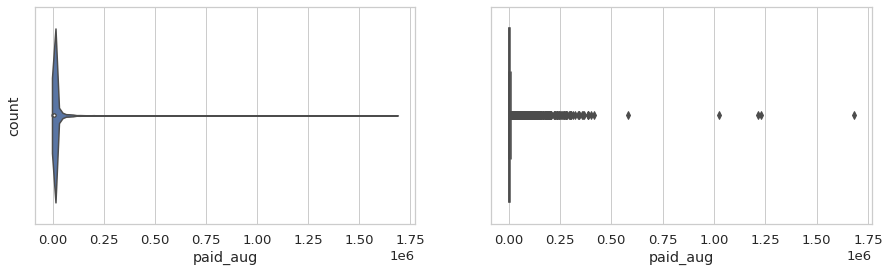

paid_jul
Skew : 17.22


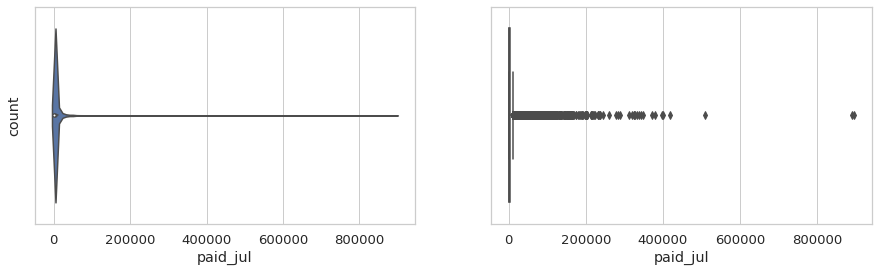

paid_jun
Skew : 12.91


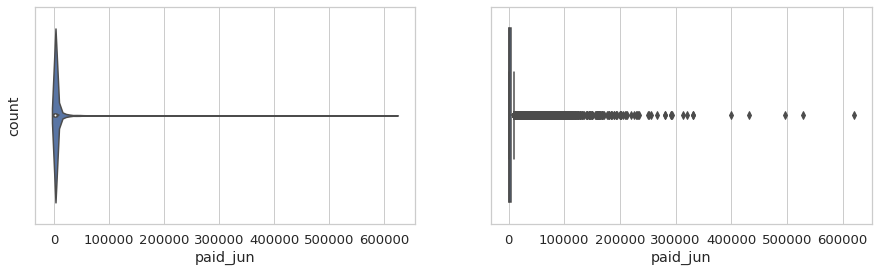

paid_may
Skew : 11.13


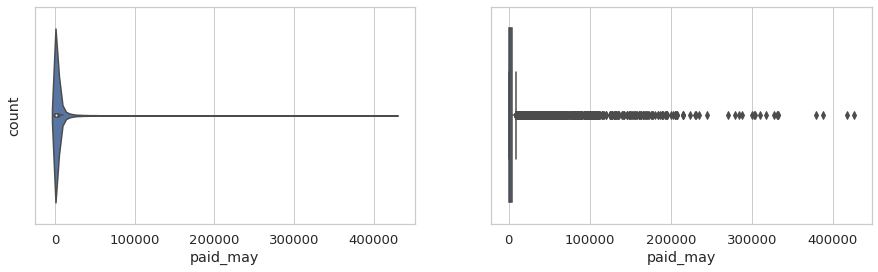

paid_apl
Skew : 10.64


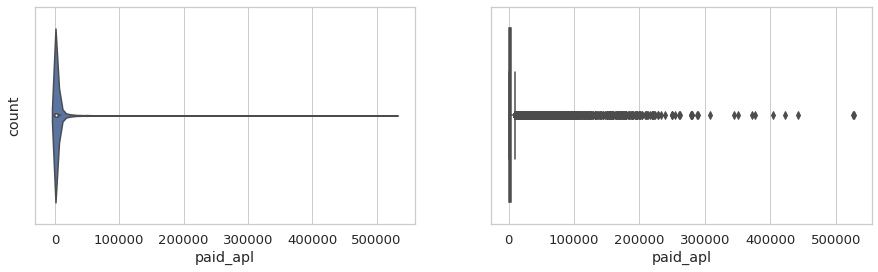

In [81]:
for col in df3.columns:
    print(col)
    print('Skew :',round(df3[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    sns.violinplot(x=df3[col])
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=df3[col])
    plt.show()

amt_aug
Skew : 2.71


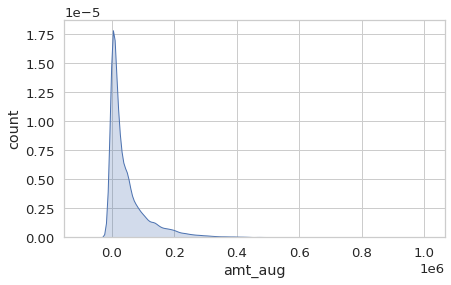

amt_jul
Skew : 3.09


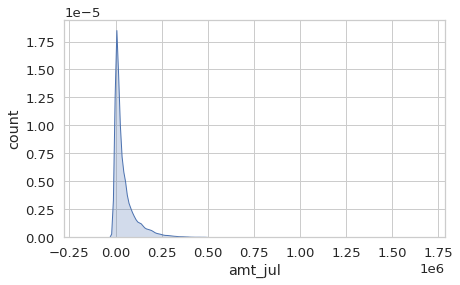

amt_jun
Skew : 2.82


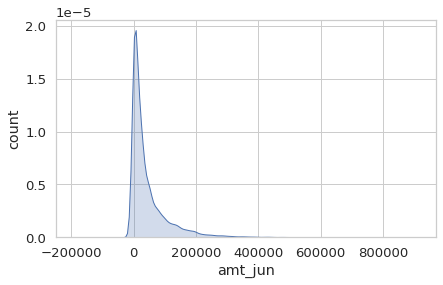

amt_may
Skew : 2.88


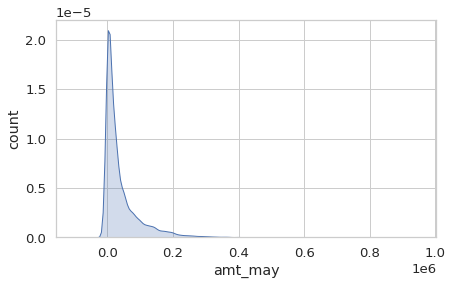

amt_apl
Skew : 2.85


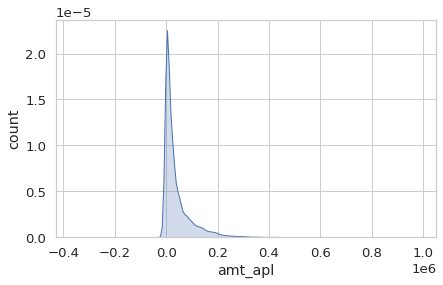

paid_sep
Skew : 14.67


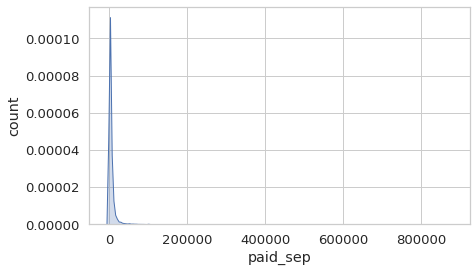

paid_aug
Skew : 30.45


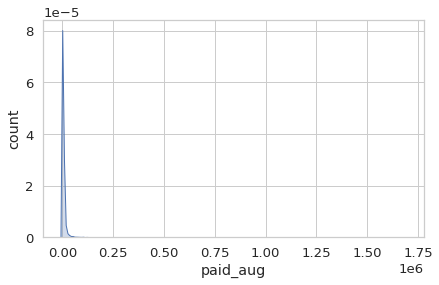

paid_jul
Skew : 17.22


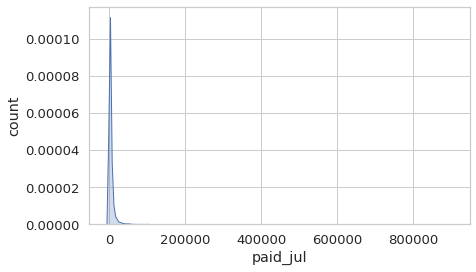

paid_jun
Skew : 12.91


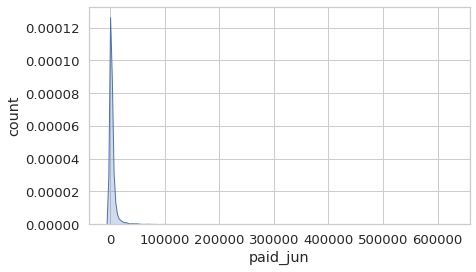

paid_may
Skew : 11.13


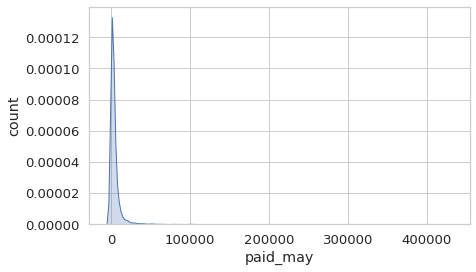

paid_apl
Skew : 10.64


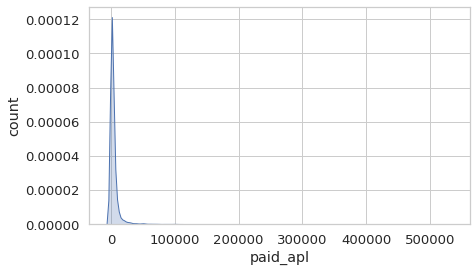

In [66]:
for col in df3.columns:
    print(col)
    print('Skew :',round(df3[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    sns.kdeplot(x=df3[col], shade=True)
    plt.ylabel('count')
    plt.show()

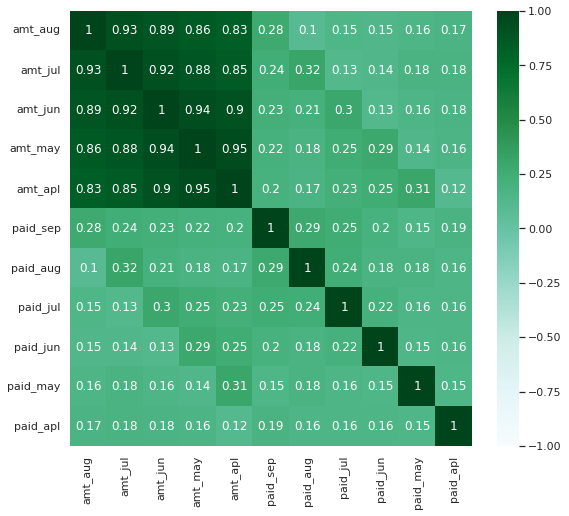

In [84]:
matrizc = df3.corr()
sns.set(rc = {'figure.figsize':(9,8)})
sns.heatmap(matrizc, vmin = -1, vmax = 1, cmap = "BuGn", annot= True)

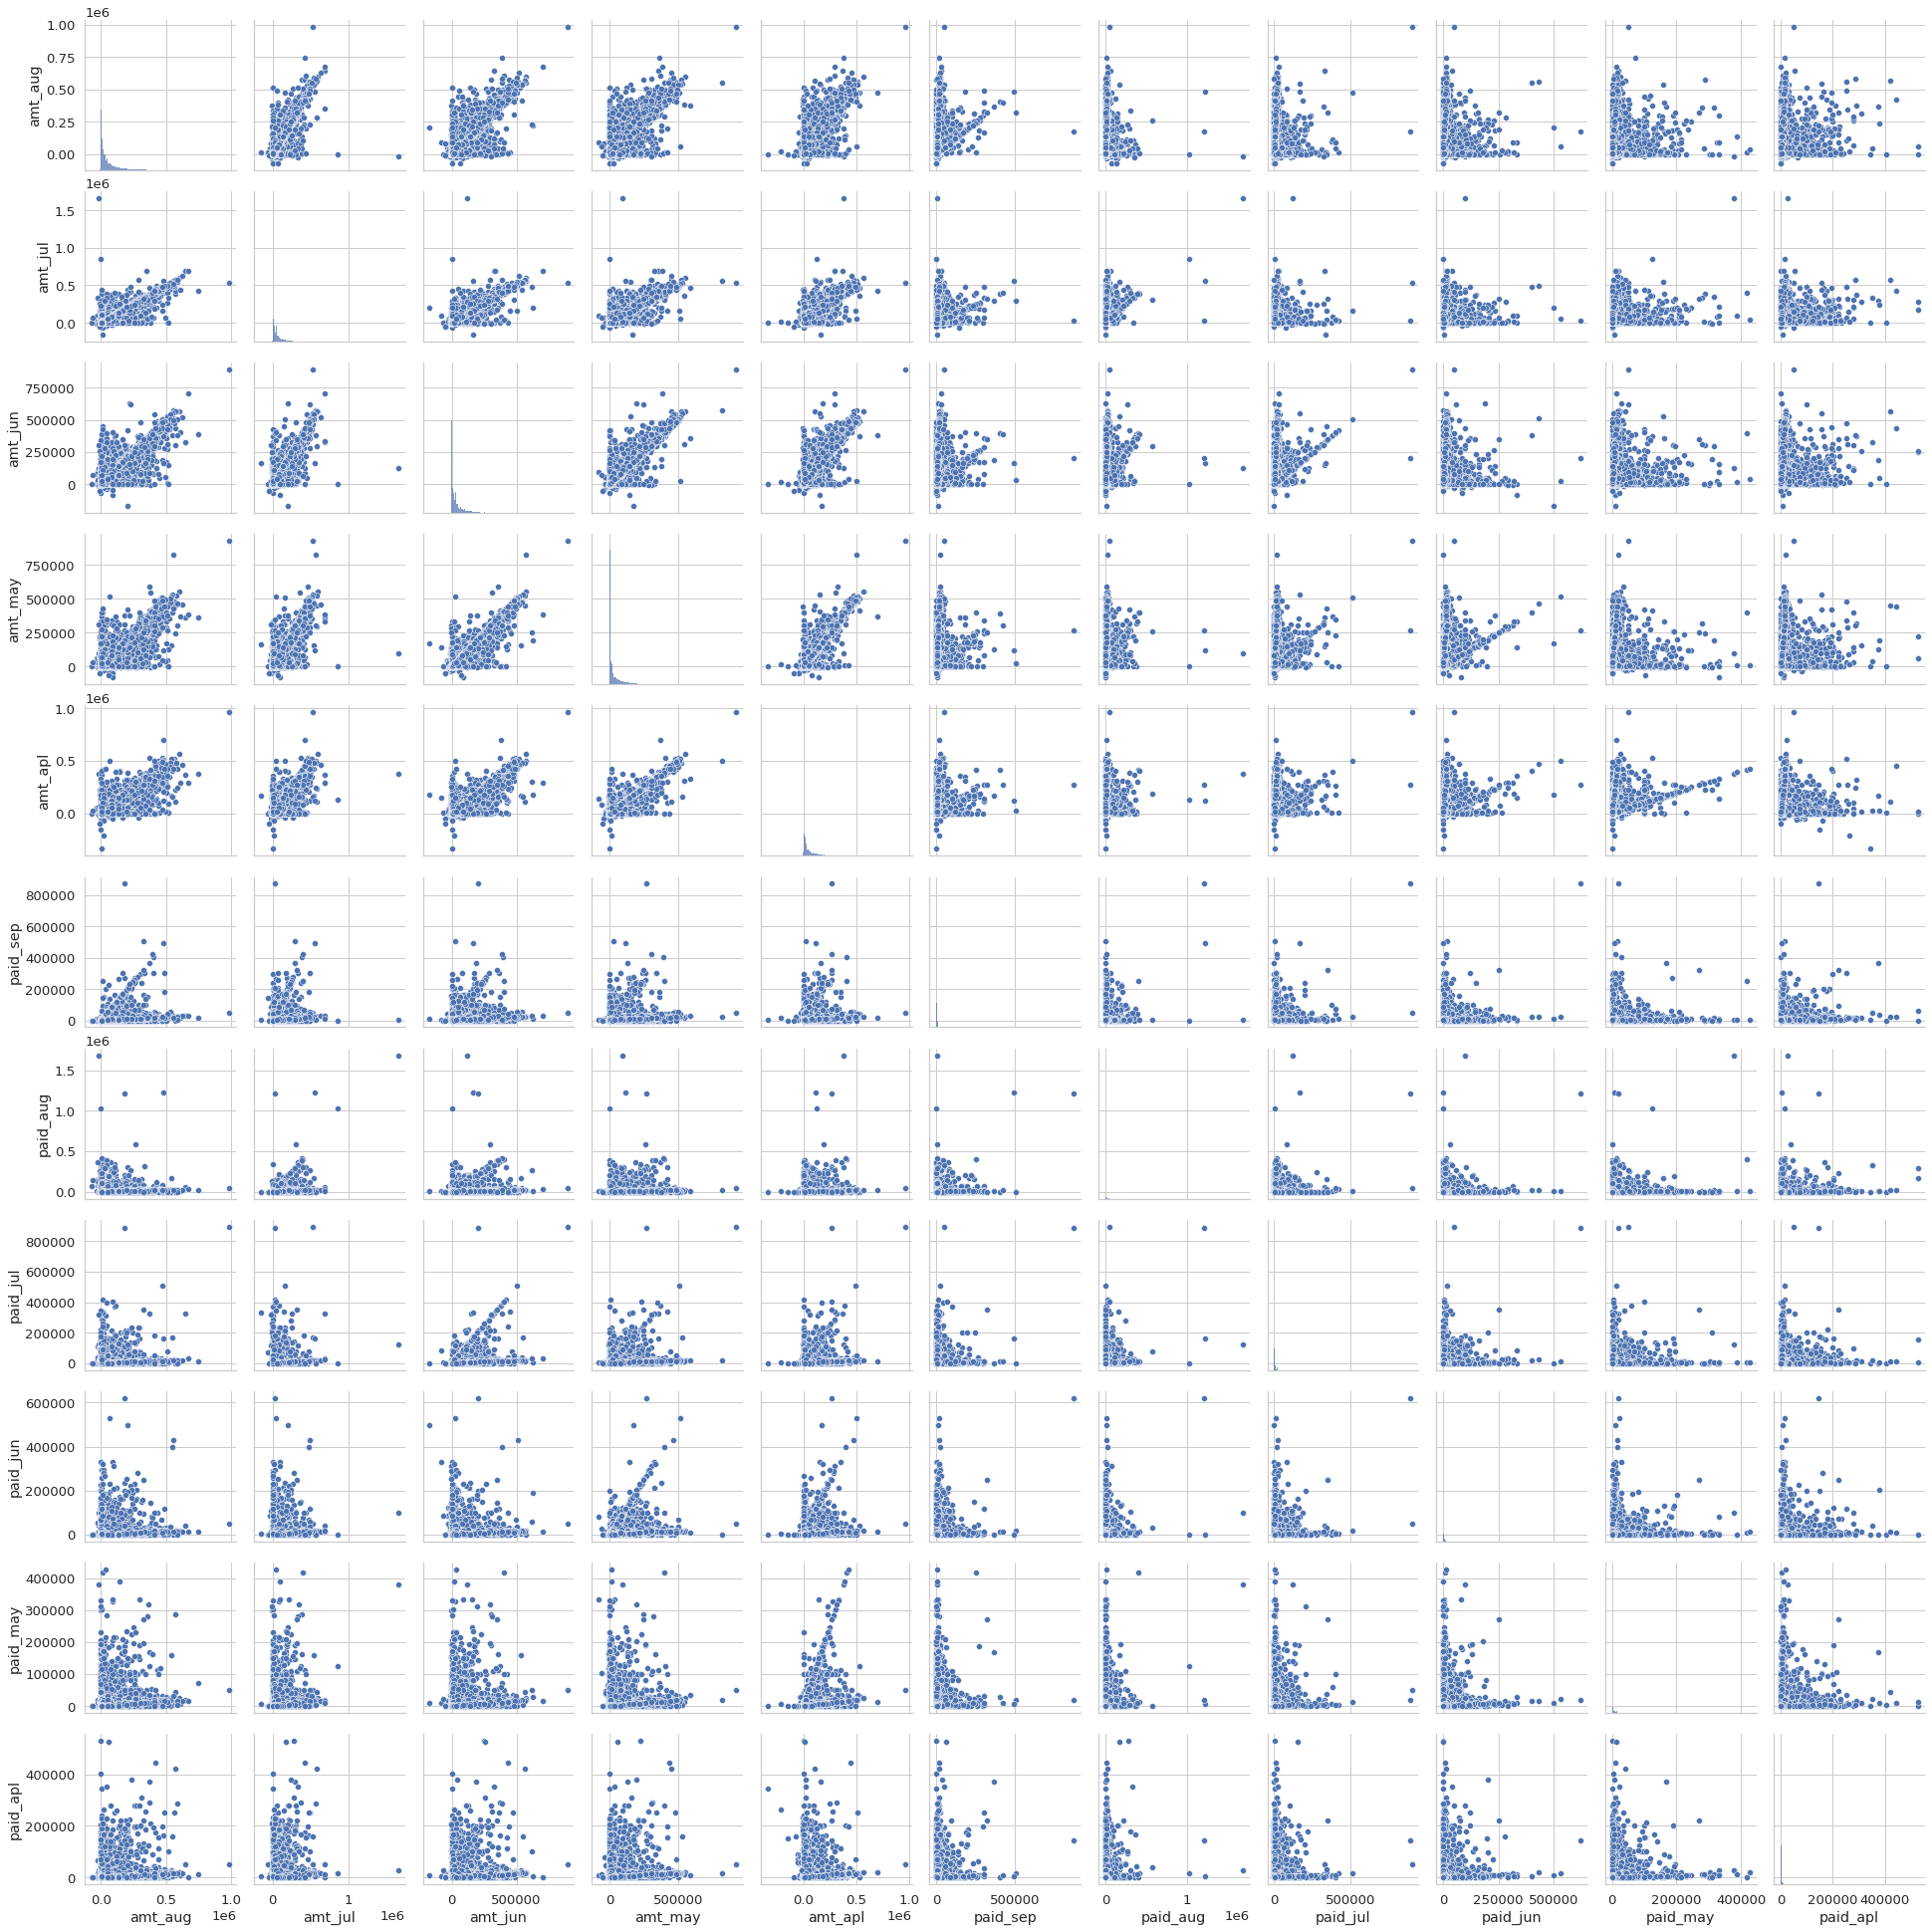

In [83]:
    sns.pairplot(df3)
    plt.show()

# **10. Interpreta y explica cada uno de los gráficos indicando cuál es la información más relevante que podría ayudar en el proceso de toma de decisiones.**

El análisis comienza con las boxplot y las gráficas de kernel, éstas nos dan información valiosa pero por separado, una nos da los cuartiles y todos aquellos datos que son un outlayer: destaca que casi todas las variables presentan una cantidad importante de outliers y es necesario realizar mayores ajustes; por otro lado, la gráfica de kernel es una representación suavizada del histograma, mismo que ya se explicó y se puede observar que muchas de las variables están cargadas a la izquierda.

Por otro lado, se encuentran las gráficas de violín, éstas son un mix entre las boxplot y las gráficas de kernel, la gráfica de violín integra las dos gráficas en una sola representación, ayuda a visualizar de un solo golpe la distribución de los datos y los cuartiles.

Finalmente, se muestra de dos maneras diferentes la representación de las correlaciones, en matriz y en gráficas de puntos. Descata la alta correlación que existe en el monto cargado cada mes (AMT), ya qué es muy fuerte de manera positiva.